<a href="https://colab.research.google.com/github/dhruvlohia2996/Machine-learning/blob/main/Predicting_Insurance_Claim_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

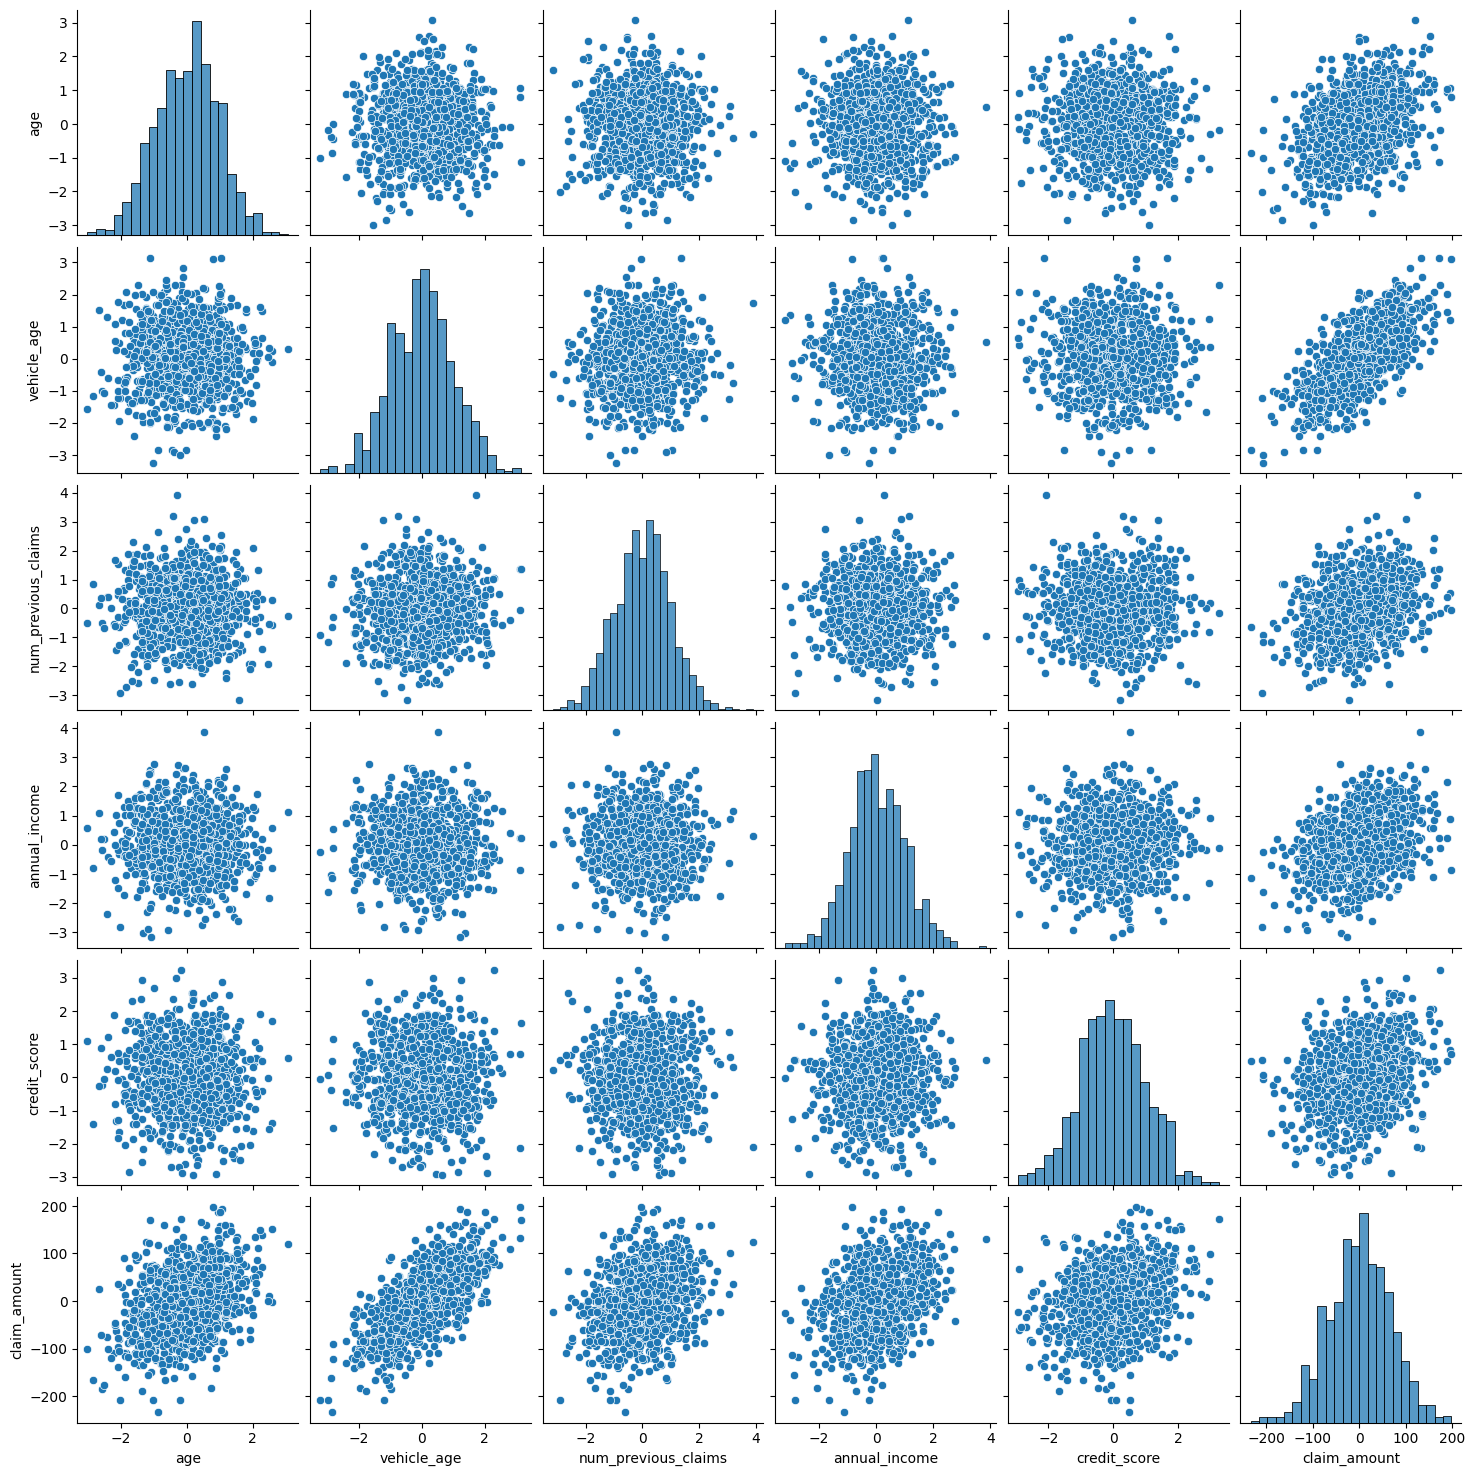

Mean Absolute Error: 22.182798085517444
Mean Squared Error: 804.2791068641516
Root Mean Squared Error: 28.35981500052762
R2 Score: 0.8081783798452162


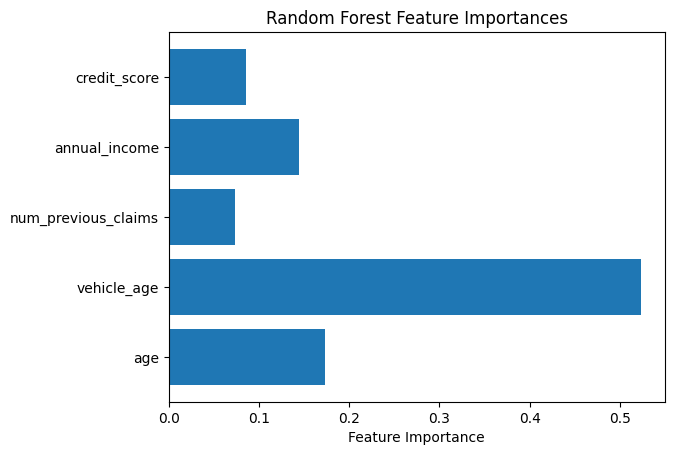

In [3]:
# Step 1: Install Required Libraries
!pip install pandas scikit-learn matplotlib seaborn --quiet

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 3: Load Dataset
# Upload your dataset or use an example dataset
# Example: synthetic data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=5, noise=20, random_state=42)
columns = ['age', 'vehicle_age', 'num_previous_claims', 'annual_income', 'credit_score']
df = pd.DataFrame(X, columns=columns)
df['claim_amount'] = y

# Step 4: EDA (Quick)
sns.pairplot(df)
plt.show()

# Step 5: Prepare Data
X = df.drop('claim_amount', axis=1)
y = df['claim_amount']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Predict & Evaluate
y_pred = model.predict(X_test_scaled)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# Step 8: Feature Importance
importances = model.feature_importances_
plt.barh(columns, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()